# EE16B: Circuit Analysis with `lcapy`

# Installation and Setup
### Troubleshooting
At any point, if you get a `Symbol is not callable` error or `NaN`s start appearing, please restart your kernel.

### Known bugs
Voltage/current sources may display upside down, with their + and - terminals reversed in the circuit drawing. In this case, the analysis will still be as if the voltage sources were correctly oriented i.e. the reverse of what the drawing appears to indicate.

### Necessary Imports
Let's get the basic imports out of the way up front real quick.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Test Anaconda Distribution
Let's first make sure your Anaconda distribution includes the `sympy` library which is necessary for `lcapy` to work.

In [2]:
try:
    import sympy
    print("Your Anaconda distribution includes sympy. No actions necessary here!")
except ImportError:
    print("sympy is missing in your Anaconda distribution. If you did not install Python3 through Anaconda, then do so now.")
    print("If you are sure you have the Anaconda distribution, then in your terminal of choice, run 'conda install sympy'")

Your Anaconda distribution includes sympy. No actions necessary here!


### Install `lcapy` if not already present
Next up, we test to see if `lcapy` is present. If not, we'll try to install it for you automagically.

In [3]:
try:
    import lcapy
    print("It looks like lcapy is installed on your computer — you're all set!")
except ImportError:
    print("We can't find lcapy on your computer, so we're going to go ahead and try to install it for you.")
    import sys
    !{sys.executable} -m pip install --user https://github.com/mph-/lcapy/zipball/master
    print("If the above command succeeded, lcapy should be installed on your computer, so go ahead and re-run this code block to ensure everything works.")

It looks like lcapy is installed on your computer — you're all set!


### Patch `lcapy` installation dynamically
Unfortunately, `lcapy` assumes you have a $\LaTeX$ installation running on your computer, which is certainly not the case for everyone. Therefore, we do what is called "monkey-patching" in Python land to dynamically modify the `lcapy` module at runtime. 

Note that we use a free web-based $\LaTeX$ compiler API online, which is why there will be a processing delay when you try to draw circuits. Please don't refresh constantly --- it's a free service, don't abuse it.

You don't need to know how exactly this code works, but you need to execute it in order to draw circuits in this iPython notebook.

**Important**: If you would like to use your local TeX installation to render circuits, then simply set the boolean flag `USE_LATEX_API` to `False` in the code below. We recommend the full TeXLive installation if you decide to go this route.

In [4]:
f

Done monkey-patching lcapy libraries.
Using the web-based API for circuit rendering.
Please be patient — rendering circuits may take a few seconds (longer if you have a slow internet connection).


# An Introduction to `lcapy`
## Constructing one-port circuits
Now that we've got this shiny new tool, let's explore it! Let's start by constructing a basic two-resistor network.

In [5]:
two_resistor_network_parallel = (lcapy.R(1) | lcapy.R(5))

Wait... nothing happened? That's right, you haven't drawn anything yet! 

Let's explore the anatomy of the `lcapy` command. We have `(lcapy.R(1) | lcapy.R(5))`, which looks a _lot_ like `lcapy.R(1)` $\parallel$ `lcapy.R(5)`, doesn't it? This syntax is quite intuitive, and you'll be masters at it in no time.

Now, let's go ahead and draw it, because pictures are worth a thousand words.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpt77ifpyb.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpt77ifpyb.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 12322)



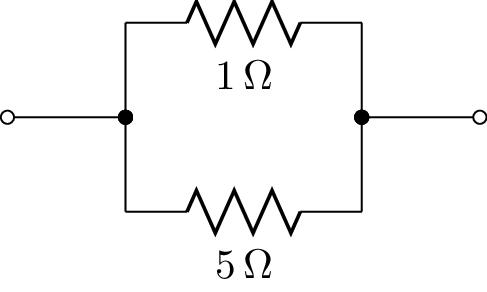

In [6]:
two_resistor_network_parallel.draw()

### Equivalents and more complex circuits
Lcapy can automatically simplify circuits and find their Thevenin and Norton equivalents, if they exist.

Here's the simplified version of the basic parallel two-resistor network above:

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpf4whl259.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpf4whl259.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 6333)



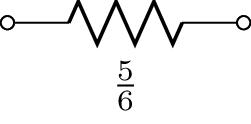

In [7]:
two_resistor_network_parallel.simplify().draw()

Let's go ahead and construct a new network composed of a DC 1V power source connected to our two-resistor network.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpb9lwx5wx.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpb9lwx5wx.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 16982)



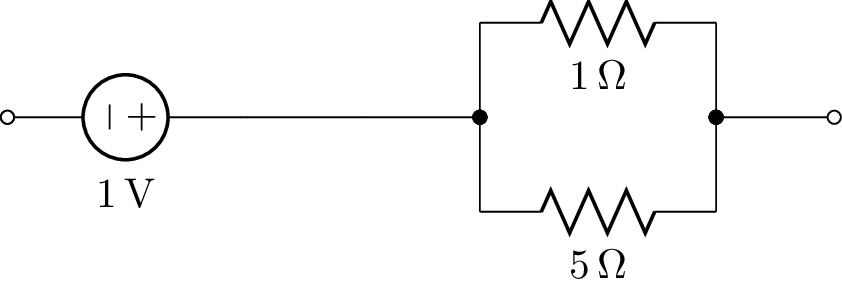

In [8]:
simple_network = lcapy.Vdc(1) + two_resistor_network_parallel
simple_network.draw()

What's the Norton equivalent, you may ask? And `lcapy` will answer:

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmp1ut0twg2.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmp1ut0twg2.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 12772)



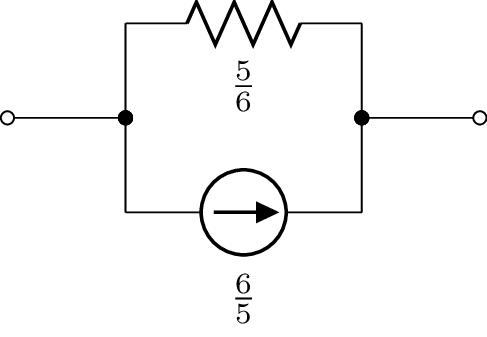

In [9]:
simple_network.norton().draw()

Can't forget about our good friend Thévenin either:

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpp6q69s5g.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpp6q69s5g.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 10353)



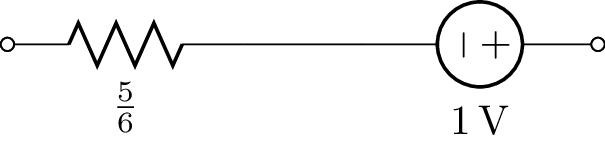

In [10]:
simple_network.thevenin().draw()

We can also use Lcapy for more complex networks involving capacitors and resistors.

Let's make an V-L-(C-RR) network where Vdc is our DC power source. Note how the operator precedence is read from left-to-right (e.g. `+` and `|` have the same precedence, and are simply read left-to-right).

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpecpz5qgc.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpecpz5qgc.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 31086)



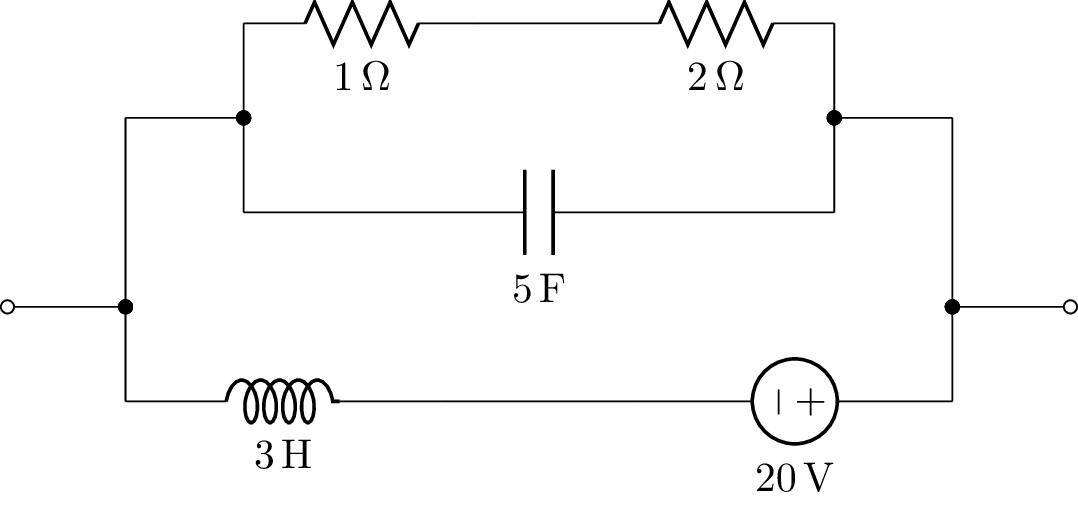

In [11]:
test_network = (lcapy.R(1) + lcapy.R(2) | lcapy.C(5) | lcapy.L(3) + lcapy.Vdc(20))
test_network.draw()

Let's go ahead and simplify it a bit, then redraw it:

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpyn02f_lk.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpyn02f_lk.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 24971)



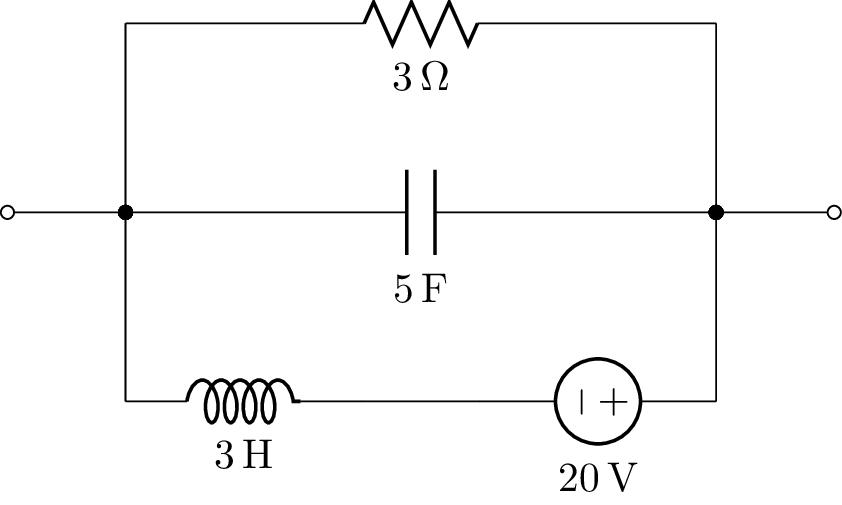

In [12]:
test_network.simplify().draw()

What happens if we try to find the Norton equivalent of a network that doesn't actually have one? `Lcapy` will throw an error.

In [13]:
try:
    test_network.norton().draw()
except ValueError as e:
    print(f"Lcapy threw a ValueError:\n\n{e}!")

Lcapy threw a ValueError:

The MNA A matrix is not invertible for dc analysis because:
1. there may be capacitors in series;
2. a voltage source might be short-circuited;
3. a current source might be open-circuited.
  Check there is a DC path between all nodes.!


### RC circuit analysis

`Lcapy` can automate a lot of the frequency domain circuit analysis that we've been doing in class.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpkfqu4d4d.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpkfqu4d4d.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 9509)



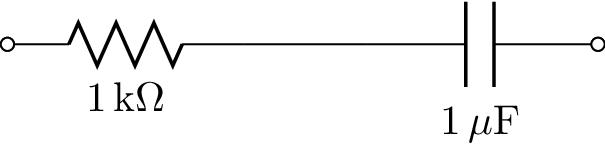

In [14]:
rc_network = (lcapy.R(1e3) + lcapy.C(1e-6))
rc_network.draw()

For instance, we can find impedance as a function of $jw$. To get it in the best form, we recommend using `.Z.jomega`

That being said, there are lots of other ways to clean it up --- for instance `.Z.jomega.ZPK()` and `.z.jomega.canonical()`. Definitely play around with them and pick the one you like best!

In [15]:
rc_network.Z.jomega

-1000⋅ⅉ⋅(ⅉ⋅ω + 1000) 
─────────────────────
          ω          

In [16]:
rc_network.Z.jomega.ZPK()

1000⋅(ω - 1000⋅ⅉ)
─────────────────
        ω        

In [17]:
rc_network.Z.jomega.canonical()

1000⋅(ω - 1000⋅ⅉ)
─────────────────
        ω        

Can we compute poles and zeros symbolically? We sure can!

In [18]:
rc_network.Z.denominator.zeros(), rc_network.Z.jomega.zeros()

And can we plot it? Of course we can!

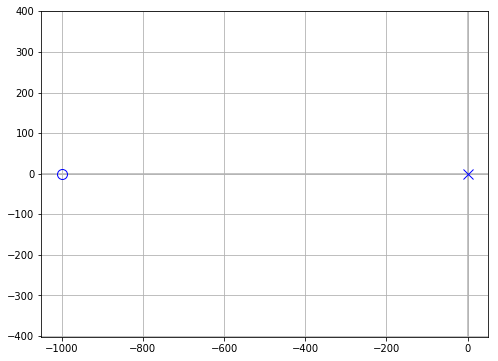

In [19]:
lcapy.Hs(rc_network.Z).plot()

What about the exact numerical value of the frequency response?

Note that the output is a complex number, which is very nice, since it gives us both the phase and magnitude information.

In [20]:
rc_network.Z.frequency_response(0.1e9)

(1000-0.0015915494309189536j)

**Wait, this frequency response doesn't look right! I'm pretty sure it should be something else based on my 16B knowledge.**

Usually, when we build an RC circuit, we are interested in finding the voltage between the resistor and capacitor, whereas the above s-domain (frequency) response only looks at the output port of the whole circuit (input-R-C-output with no ground connection).

So how do we do get the voltage across just the resistor or the capacitor in `lcapy`? We can make use of the `LSection` procedure. If we create an `LSection(network_1, network_2)`, we can measure the transfer function of $V_\text{in} \rightarrow \text{network}_1 \rightarrow V_\text{out} \rightarrow \text{network}_2 \rightarrow \text{ground}$.

Unfortunately this can't be drawn without the use of netlists (which we will explore later), but it can be analyzed.

Note that with the LSection, we need to use `Z1oc` instead of `Z`.

This is all getting kind of complicated... really, when dealing with circuits like this, netlists are probably the better choice. But more on that later!

In [21]:
rc_l = lcapy.LSection(lcapy.R(1e3), lcapy.C(1e-6))
rc_l.Z1oc.jomega

       1000000⋅ⅉ
1000 - ─────────
           ω    

Same poles and zeros, unsurprisingly.

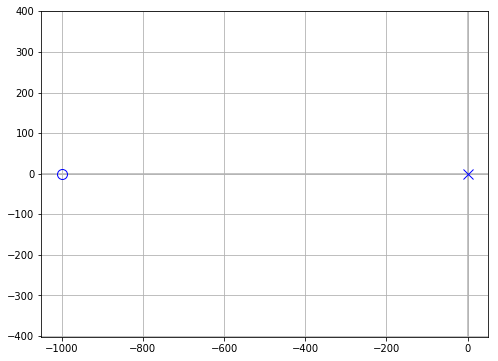

In [22]:
lcapy.Hs(rc_l.Z1oc).plot()

With a bit of work, we can also plot the frequency response on a log-log scale (we can do this symbolically in code!) and compare it to its Bode approximation (we do the linear approximation by hand).

Keep in mind that the frequency response takes a frequency, not angular velocity, and $f = 2\pi \omega$.

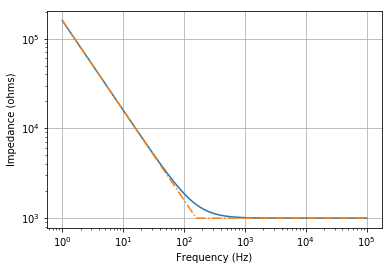

In [23]:
# Frequency response
f = np.logspace(0, 5, 400)
Z = rc_l.Z1oc.frequency_response(f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(f, abs(Z))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Impedance (ohms)')
ax.grid(True)

# Bode plot
def bode_approximation(f):
    w = 2 * lcapy.pi * f
    if w < 1E3:
        return 1E3 * 1E3 / w
    else:
        return 1E3

ax.loglog(f, [bode_approximation(x) for x in f], '-.')

plt.show()

Let's take a look at a driven RC network (V-R-C network) and its admittance (reciprocal of impedance).

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpzhds_2r5.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpzhds_2r5.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 13417)



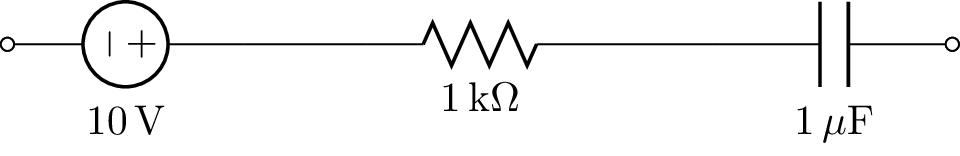

       s       
───────────────
1000⋅(s + 1000)

In [24]:
driven_rc_network = lcapy.Vdc(10) + lcapy.R(1e3) + lcapy.C(1e-6)
display(driven_rc_network.draw())
driven_rc_network.Y

What about the impedance matrix for an R-C low-pass filter?

In [25]:
rc_divider = lcapy.LSection(lcapy.R(1e3), lcapy.C(1e-6))
rc_divider.Zoc

⎡       1000000⎤
⎢1000 + ───────⎥
⎢          s   ⎥
⎢              ⎥
⎢   1000000    ⎥
⎢   ───────    ⎥
⎣      s       ⎦

You may wonder what would happen if we try to draw `LSection`-based objects? Languish in curiosity no more, for we shall provide you the answer.

In [26]:
try:
    rc_divider.draw()
except ValueError as e:
    print(f"ValueError: {e}")

ValueError: Cannot generate netlist for two-port objects


OK, we'll give you a sneak peek of netlists. Yay for actual filter analysis!

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmp8xk96gik.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmp8xk96gik.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 15938)



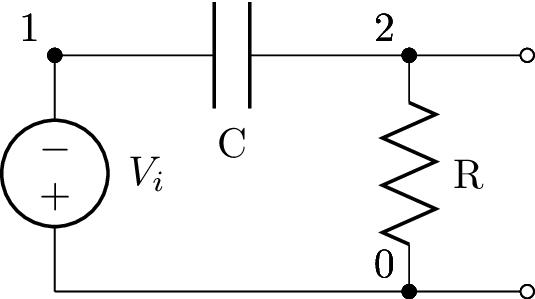

In [27]:
cct = lcapy.Circuit()
cct.add("""
Vi 1 0_1; down
C 1 2; right, size=1.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right, size=0.5
P1 2_2 0_2; down
W 2 2_2;right, size=0.5""")
cct.draw()

What's the transfer function of this filter, you may ask?

In [28]:
H = (cct.R.V.laplace() / cct.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

  ⅉ⋅C⋅R⋅ω  
───────────
ⅉ⋅C⋅R⋅ω + 1

And just for kicks and giggles, let's rationalize the denominator.

In [29]:
H(lcapy.j * lcapy.omega).rationalize_denominator()

 2  2  2          
C ⋅R ⋅ω  + ⅉ⋅C⋅R⋅ω
──────────────────
    2  2  2       
   C ⋅R ⋅ω  + 1   

And find its magnitude.

In [30]:
H(lcapy.j * lcapy.omega).magnitude

   _____________________
  ╱  4  4  4    2  2  2 
╲╱  C ⋅R ⋅ω  + C ⋅R ⋅ω  
────────────────────────
       2  2  2          
      C ⋅R ⋅ω  + 1      

And simplify that nasty expression.

In [31]:
H(lcapy.j * lcapy.omega).magnitude.simplify()

     C⋅R⋅│ω│     
─────────────────
   ______________
  ╱  2  2  2     
╲╱  C ⋅R ⋅ω  + 1 

Can't forget about the phase! We'll even do it in degrees, how nice of us.

In [32]:
H(lcapy.j * lcapy.omega).phase_degrees

180⋅atan2(1, C⋅R⋅ω)
───────────────────
         π         

And what if we want to plug in some specific values?

In [33]:
H1 = H.subs({'C': 1e-6, 'R': 1e3})
H1(lcapy.j * lcapy.omega).simplify()

   ⅉ⋅ω    
──────────
ⅉ⋅ω + 1000

Since this is 16B after all, we simply must do a Bode plot. Let's go ahead and do one with the actual values (no linear approximations here!) of the transfer function magnitude.

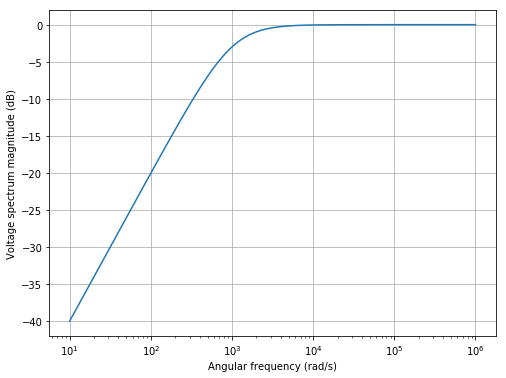

In [34]:
H1(lcapy.j * lcapy.omega).dB.plot(np.logspace(1, 6, 500), log_scale=True)

Can't forget about the phase (pro tip: especially on midterms).

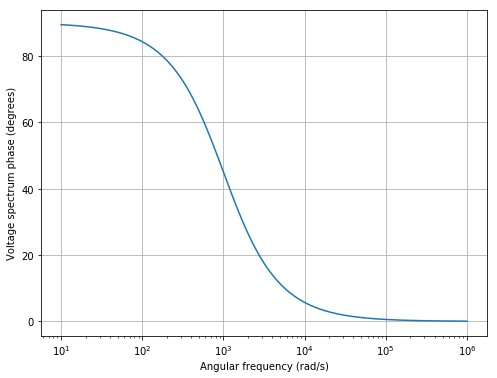

In [35]:
H1(lcapy.j * lcapy.omega).phase_degrees.plot(np.logspace(1, 6, 500), log_scale=True)

`Lcapy` handles AC with aplomb, as you might expect. Here's a step-function voltage source in series with an R-C network.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmp2fs25b3p.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmp2fs25b3p.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 13775)



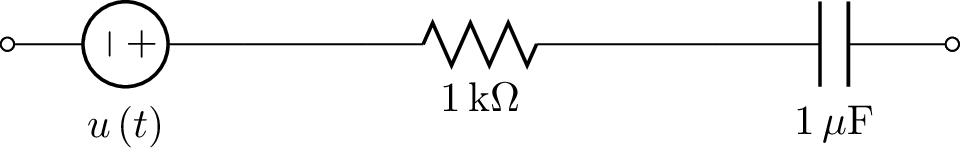

In [36]:
RCDC = lcapy.Vstep(1) + lcapy.R(1e3) + lcapy.C(1e-6, 0)
RCDC.draw()

We can find its transient response by calling an entirely unsurprising function name.

In [37]:
RCDC.Isc(lcapy.s).transient_response()

⎧ -1000⋅t           
⎪ℯ                  
⎨────────  for t ≥ 0
⎪  1000             
⎩                   

To progress further, we must now call upon netlists. You will soon fall in love with them (and hate them at times) but the power of netlists cannot be understated. You'll be performing netlist jiu-jitsu in no time!

# Netlists

Netlists can be used to analyze and draw circuits more precisely, but require use of a brand new input format. Let's jump in with an example, the classic voltage divider. We can construct this circuit, display it, and calculate the value of `x` in terms of other elements -- all using Lcapy. Don't worry about understanding all the code just yet. We'll walk through it step by step.

Definitely feel free to look at [the Lcapy documentation](http://lcapy.elec.canterbury.ac.nz) if you're ever confused or want to do even more!

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpu5iq9ksk.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpu5iq9ksk.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 21048)



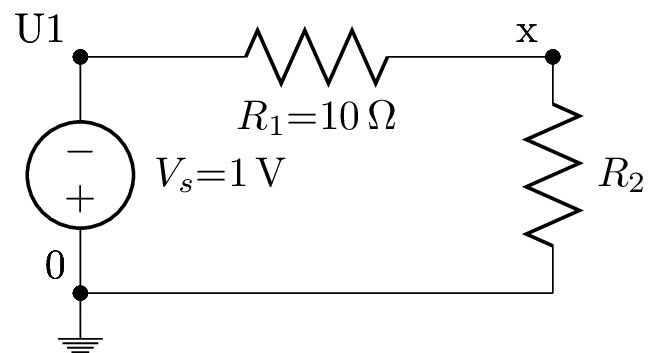

In [38]:
voltage_divider = lcapy.Circuit()
voltage_divider.add('Vs U1 0 1; down')
voltage_divider.add('R1 U1 x 10; right=2')
voltage_divider.add('R2 x 3_; down')
voltage_divider.add('W 3_ 0; left')
voltage_divider.add('W 0 4; down=0.1, ground')
voltage_divider.draw()

In [39]:
voltage_divider.x.v

   R₂  
───────
R₂ + 10

## Simple nodes and voltage sources

To create a Netlist, we use `lcapy.Circuit()`.

We then add components to it using `.add(string)`, where `string` is the description of the component.

You could also add all the components at once like so:
```python
my_netlist.add("""
line 1
line 2 
...
""")
```

This description will generally follow the following format:

- `'name to from [value]; [position]'`.

The elements in brackets are optional. However, `position` is necessary if we want to draw the circuit.

`name` is the name of the circuit element. It will show up in symbolic calculations and be displayed in the drawing. Names beginning with `V` will be voltage sources; use names starting with `R` for resistors (e.g. `R1` or just `R`), `L` for inductors, `C` for capacitors, and `I` for current sources (see also [the documentation for netlists](http://lcapy.elec.canterbury.ac.nz/netlists.html#component-specification)).

`from` is the node the circuit element starts at, and `to` is the node it ends at. Note that for voltage sources, the "+" is next to `to` and the "-" is next to `from`.

__How to specify a node name:__
- Ground is always `0`
- To make a node label hidden, add an underscore somewhere, e.g. `1_`
- To make a node label visible, don't use an underscore
- Don't use `.` in the node name (see [the documentation](http://lcapy.elec.canterbury.ac.nz/schematics.html#node-names) if you're curious about what `.` actually does)

Node values can be specified with exponential notation. For instance, $10 k\Omega$ would be `10e3`.

You can omit node values -- then the answer will be symbolic in terms of `name`. (For some elements this is not so simple; for instance creating a constant voltage source requires a bit more work, as we will see later)

Now, a simpler example. Let's create a 3V voltage source.

In [40]:
voltage_source_1 = lcapy.Circuit()
voltage_source_1.add('Vs U1 0 3')

But when we try to draw it, something will go horribly wrong.

In [41]:
try:
    voltage_source_1.draw()
except RuntimeWarning as w:
    print(f"RuntimeWarning: {w}")

We need to add the position for it to be drawn. We can use `up`, `down`, `left`, or `right`. That will tell Lcapy how to draw the element -- for instance, if we have a voltage source going `down` from `U1` to `0`, then `U1` will be drawn above `0`, with the voltage source in between them.

In [42]:
voltage_source_2 = lcapy.Circuit()
voltage_source_2.add('Vs U1 0 3; down')

This time, drawing will work as expected.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpy6eatxql.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpy6eatxql.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 9809)



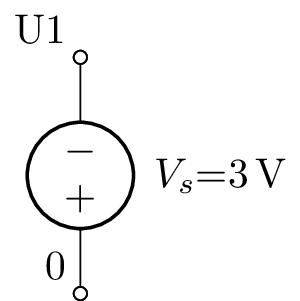

In [43]:
voltage_source_2.draw()

Cool! We can use this circuit for analysis as-is. For instance, we can find the voltage at a node.

**Evaluating current at a node:**
- Get the voltage in a nice format with `netlist_name.node_name.v`

Let's see what the voltage is.

In [44]:
voltage_source_2.U1.v

3

Pretty good! But what if we wanted to find the voltage in terms of $V_s$?

If we leave the value blank, `lcapy` will treat it as a non-constant voltage source and give us voltage as a function of time.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpswssijnd.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpswssijnd.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 8491)



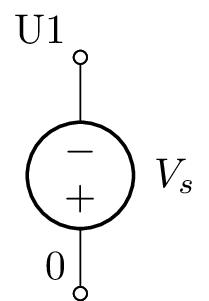

In [45]:
voltage_source_3 = lcapy.Circuit()
voltage_source_3.add('Vs U1 0; down')
voltage_source_3.draw()

In [46]:
voltage_source_3.U1.v

vs(t)

### DC voltage source

To get a DC voltage source, we need to tell `lcapy` that the voltage source is constant.

To do this, we make the value `dc name`, where `name` is the variable we are using to represent the value of $V_s$. 

We recommend just reusing the name `Vs` for clarity.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpo6624_hp.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpo6624_hp.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 9678)



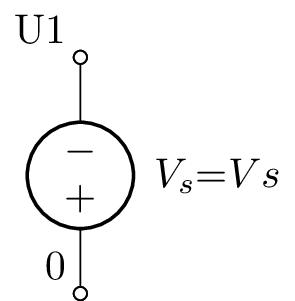

In [47]:
voltage_source_4 = lcapy.Circuit()
voltage_source_4.add('Vs U1 0 dc Vs; down')
voltage_source_4.draw()

In [48]:
voltage_source_4.U1.v

Vₛ

### Variable voltage source

What if we actually wanted to make our voltage some specific function?

We can do this by just putting a function of `t` in for value! We will need to enclose it in `{}`, so for instance, $\sin(t^2) + t$ would become `{sin(t**2) + t}`.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpeggj3jc7.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpeggj3jc7.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 11796)



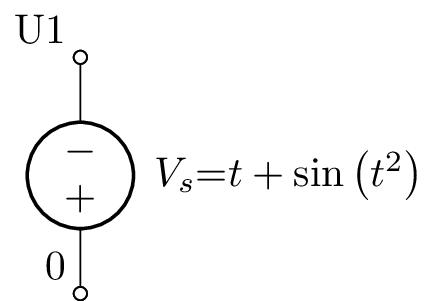

In [49]:
voltage_source_4 = lcapy.Circuit()
voltage_source_4.add('Vs U1 0 {sin(t**2) + t}; down')
voltage_source_4.draw()

To get the value of U1 at a given time, we can just evaluate the transient response at that time (and at a few selected points, just to show you how it's done). Note that we use `V` instead of `v` here.

       ⎛ 2⎞
t + sin⎝t ⎠

0 0.0
1 1.8414709848078965
2 1.2431975046920718
3 3.4121184852417565


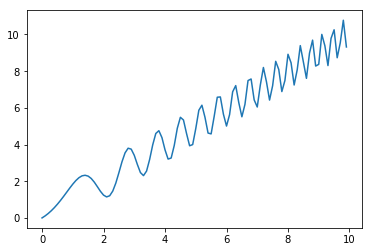

In [50]:
# Display the actual transient response
display(voltage_source_4.U1.V.transient_response())

# Print a few sample points
for i in range(0, 4):
    print(i, voltage_source_4.U1.V.transient_response(i))

# Plot the exact transient response
x_vals = np.arange(0.0, 10.0, 0.1)
y_vals = voltage_source_4.U1.V.transient_response(x_vals)
plt.plot(x_vals, y_vals)
plt.show()

### AC voltage sources

If we just want a regular sinusoidal input, we can simply use `ac A phase w` with appropriate values for amplitude ($A$), phase ($\phi$), and angular velocity ($\omega$).

If you want to be able to evaluate the transfer function in terms of $\omega$, which we will explore in a later exercise, just use `ac A phase`.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpjoft2855.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpjoft2855.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 9427)



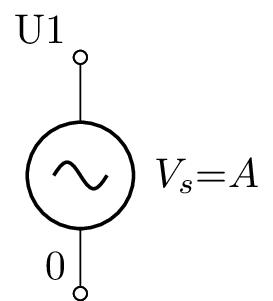

In [51]:
voltage_source_5 = lcapy.Circuit()
voltage_source_5.add('Vs U1 0 ac A B C; down')
voltage_source_5.draw()

Where would you expect A, B, and C to show up in the time-domain voltage expression? Check your answer against the result.

In [52]:
voltage_source_5.U1.v

A⋅cos(B + C⋅t)

As a side note, we can get the phasor using the capital letter `.V` instead of the lowecase letter `.v`.

Actually, `.V` can be used in place of `.v` in other situations. Try it out! See which one you prefer.

In [53]:
voltage_source_5.U1.V

⎧      ⅉ⋅B⎫
⎨C: A⋅ℯ   ⎬
⎩         ⎭

## Exercise 1. Voltage source analysis.

Here is a simple exercise to get you started with netlists.

Create a DC voltage source with $V_s = 5 mV$ and evaluate the DC voltage at ground and $U_1$.

In [54]:
my_circuit = lcapy.Circuit()
# my_circuit.add(?) # TODO: Complete and uncomment this line

In [55]:
# TODO: Draw the circuit


In [56]:
# TODO: Evaluate the DC voltage at U1


## Adding the resistors.

Now that you understand the basic netlist syntax, we can try adding more elements.

Let's say we want to connect a resistor to our voltage source. We just need to specify that it should start at the node where the voltage source ended and go off to the right.

To prevent collisions with the voltage source label, I'll give some extra space by specifying `right=2`.

### Exercise 2. Completing the Voltage Divider

1. Add a $2 k\Omega$ resistor R2 going down from x to a new hidden node, such as `3_`. (If you try to connect it to ground directly, you will get an error).
2. Add a wire going from the new hidden node to ground. The format for a wire is `'W to to from direction'`
3. Add the grounding symbol if you want (it's purely decorative). This one's pretty formulaic, just make sure to pick the appropriate `from` and `to` nodes: `voltage_divider.add('W to from; down=0.1, ground')`
4. Analyze your circuit -- find the voltage at x.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmppn8zidtl.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmppn8zidtl.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 15745)



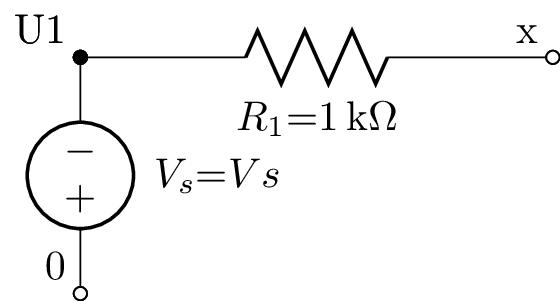

In [57]:
voltage_divider = lcapy.Circuit()
voltage_divider.add('Vs U1 0 dc Vs; down')
voltage_divider.add('R1 U1 x 1e3; right=2')
# TODO: Add R2
# TODO: Add wire
voltage_divider.draw()

In [58]:
# TODO: Find voltage at x


## Excercise 3: Inductors and Capacitors

Here is a voltage divider circuit. Modify it so that it becomes an LC circuit with $L=1 mH$ and $C = 1 \mu F$ and plot the frequency response.

Tip: `R1` will create a resistor called R1; `L2` will create an inductor called L2test; `C3` will create a capacitor called C3 and so on...

Also take a look at how we've set up the AC voltage source. We've set the amplitude as 1 and phase as 0, but we have NOT provided any value for $w$. The reason we did that is so that we can evaluate the phasor for $x$ at any frequency we choose. We will show how to do this momentarily.

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpdrya6or6.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpdrya6or6.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 21121)



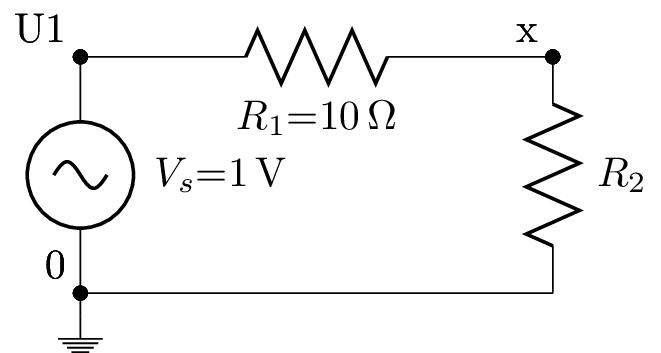

In [59]:
lc = lcapy.Circuit()
lc.add('Vs U1 0 ac 1 0; down')
lc.add('R1 U1 x 10; right=2') # TODO: Modify this line
lc.add('R2 x 3_; down') # TODO: Modify this line
lc.add('W 3_ 0; left')
lc.add('W 0 4; down=0.1, ground')
lc.draw()

Try using `.v` and `.V`. What is the difference? Which one is more helpful? Also try `.v.phasor()`.

In [60]:
# TODO: Find the value of x


Fill in the frequency response function and the Bode approximation. See if they match what you'd expect. Where is the error maximized? Is the phase interesting or boring? Why?

A couple notes here:

We need to convert frequency to angular velocity for the Bode approximation but also for the so-called 'frequency response'.

The reason for this is that we are evaluating the phasor form, which takes $w$ rather than $f$ as an argument.

You can use `netlist.node.v.phasor().magnitude.evaluate(w)` and `netlist.node.v.phasor().phase.evaluate(w)` to get the magnitude and phase of the voltage frequency response of node `node` of netlist `netlist` at angular velocity `w`

In [61]:
# TODO: Fill in the ?'s

def angular_velocity(frequency):
    return ?

def frequency_response_magnitude(f):
    w = ?
    return ?

def bode_plot_magnitude(f):
    w = angular_velocity(f)
    if w < ?:
        return ?
    else:
        return ?

f = np.logspace(0, 18, 400)
Z = frequency_response_magnitude(f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(f, abs(Z))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Impedance (ohms)')
ax.grid(True)

ax.loglog(f, [bode_plot_magnitude(x) for x in f], '-.')

plt.show()

SyntaxError: invalid syntax (<ipython-input-61-efaf3508b97c>, line 4)

In [ ]:
# TODO: Fill in the ?'s

def frequency_response_phase(f):
    w = ?
    return ?

def bode_plot_phase(f):
    return ?

f = np.logspace(0, 18, 400)
Phase = frequency_response_phase(f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("linear")
ax.plot(f, frequency_response_phase(f))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Angle')
ax.grid(True)

ax.plot(f, [bode_plot_phase(x) for x in f], '-.')

plt.show()

Here is a faster way of plotting the phase. Take a look at the code and see how it differs from the example above.

A lot cleaner, isn't it? We will see another example of this technique later in the notebook.

In [ ]:
f = np.logspace(0, 18, 400)

ax = lc.x.v(lcapy.j * lcapy.omega).phase_degrees.plot(f, log_frequency=True)
ax.plot(f, [0 for x in f], '-.') # Bode approximation

plt.show()

# Solution to exercise 3

In [ ]:
lc = lcapy.Circuit()
lc.add('Vs U1 0 ac 1 0; down')
lc.add('L U1 x 1e-3; right=2') # TODO: Modify this line
lc.add('C x 3_ 1e-6; down') # TODO: Modify this line
lc.add('W 3_ 0; left')
lc.add('W 0 4; down=0.1, ground')
lc.draw()

In [ ]:
lc.x.v

In [ ]:
lc.x.V

In [ ]:
lc.x.v.phasor()

Fill in the frequency response function and the Bode approximation. See if they match what you'd expect.

In [ ]:
def angular_velocity(frequency):
    return 2 * lcapy.pi * frequency # TODO: Fill this in

def frequency_response_magnitude(f):
    w = angular_velocity(f)
    return lc.x.v.phasor().magnitude.evaluate(w)

def bode_plot_magnitude(f):
    w = angular_velocity(f)
    if w < np.sqrt(1E9): # TODO: Fill in the ?
        return 1 # TODO: Fill in the ?
    else:
        return 1 / (w**2 * 1E-9)

f = np.logspace(0, 18, 400)
Z = frequency_response_magnitude(f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(f, abs(Z))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Impedance (ohms)')
ax.grid(True)

ax.loglog(f, [bode_plot_magnitude(x) for x in f], '-.')

plt.show()

In [ ]:
def frequency_response_phase(f):
    w = angular_velocity(f)
    return lc.x.v.phasor().phase.evaluate(w)

def bode_plot_phase(f):
    return 0

f = np.logspace(0, 18, 400)
Phase = frequency_response_phase(f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("linear")
ax.plot(f, frequency_response_phase(f))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Angle')
ax.grid(True)

ax.plot(f, [bode_plot_phase(x) for x in f], '-.')

plt.show()

# Netlist-level circuits
### The Good Ol' RLC Circuit
Now that you're masters at netlists, let's use them to analyze even more interesting circuits from lecture and homework! First, let's take a look at the basic series RLC circuit.

In this case, our element of interest is the inductor; notice that we have denoted the voltage drop across the inductor to be given by node $v$, which connects straight to ground.

In [ ]:
RLC_SeriesL = lcapy.Circuit()
RLC_SeriesL.add("""
Vi 1_ 0; down
R 1_ 2_; right, size=1.5
C 2_ v; right, size = 1.5
L v 0_3; down, size = 1.5
W 0 0_3; right
W 0_3 0_2; right, size=0.5
P1 2_2 0_2; down
W v 2_2;right, size=0.5
W 0 6; down=0.1, ground""")
RLC_SeriesL.draw()

Now, it's time to use this diagram to our advantage. As we've seen already, the usage of `lcapy` makes a circuit like this incredibly easy to analyze. For now, we'll settle for calculating the transfer function across $L$.

Note we use a **different method to calculate the transfer function here** than we did in the prior examples.

`Lcapy` is very powerful and there are many ways to do the same thing.
Here, we use the "Laplace" transform (which gives us an answer in terms of $s$) and then convert it to be in terms of $j\omega$. See the code sample below to learn how this can be done.

In [ ]:
H = (RLC_SeriesL.L.V.laplace() / RLC_SeriesL.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

Now, we have the same circuit, but let's take a look at it from a slightly different perspective, with $C$ as our component of interest. 

The best way to convince yourself of the power of this sort of analysis is to try and do it out by hand, and then compare the time taken with using the given module. 

As you gain practice with the syntax of this module, using the examples provided as a guide, your analysis potential will grow unbounded.

In [ ]:
RLC_SeriesC = lcapy.Circuit()
RLC_SeriesC.add("""
Vi 1 0; down
R 1 2; right, size=1.5
L 2 v; right, size = 1.5
C v 0_3; down, size = 1.5
W 0 0_3; right
W 0_3 0_2; right, size=0.5
P1 2_2 0_2; down
W v 2_2;right, size=0.5
W 0 6; down=0.1, ground""")
RLC_SeriesC.draw()

Predictions for the transfer function across $C$?


### Mini exercise
Try filling in the code to produce the transfer function yourself, to get some practice with the alternate method. If you get stuck, refer to the example from the previous circuit... or scroll down to see the answer.

In [ ]:
H = ?
H(?)

Try it yourself first!
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
...  
Okay, here's the answer.

In [ ]:
H = (RLC_SeriesC.C.V.laplace() / RLC_SeriesC.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

Well, was the answer you found by hand correct? If not, that's ok! This notebook is also designed to teach you how to create your own examples and problems on the fly, making this a great resource for studying for exams. If you can create an unwieldy circuit using this module, analyze it by hand, and confirm your results with the notebook's calculations, you'll be very well prepared.

For a sense of completion now, let's analyze the circuit one last time, with R as our final element of interest.

In [ ]:
RLC_SeriesR = lcapy.Circuit()
RLC_SeriesR.add("""
Vi 1 0; down
L 1 2; right, size=1.5
C 2 v; right, size = 1.5
R v 0_3; down, size = 1.5
W 0 0_3; right
W 0_3 0_2; right, size=0.5
P1 2_2 0_2; down
W v 2_2;right, size=0.5
W 0 6; down=0.1, ground""")
RLC_SeriesR.draw()

Well, does the transfer function match our expectations?

In [ ]:
H = (RLC_SeriesR.R.V.laplace() / RLC_SeriesR.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

Now that you've had some practice with using the notebook and doing some independent calculations, let's go through a quick conceptual check. Our goal in this example is to find the transfer functions across all three elements. Go ahead, run the block below.

In [ ]:
RLC_ParallelAll = lcapy.Circuit()
RLC_ParallelAll.add("""
Vi 1 0; down
W 1 2; right, size=1.5
L 2 8_; down
W 2 3; right
C 3 9_; down, size = 1.5
W 3 4; right
R 4 5_; down, size = 1.5
W 0 8_; right
W 8_ 9_; right
W 9_ 5_; right
W 0 6; down = 0.1, ground""")
RLC_ParallelAll.draw()

Well, how long would you need to find all three transfer functions? When you have your answers, compare them with those below.

In [ ]:
H = (RLC_ParallelAll.C.V.laplace() / RLC_ParallelAll.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

In [ ]:
H = (RLC_ParallelAll.L.V.laplace() / RLC_ParallelAll.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

In [ ]:
H = (RLC_ParallelAll.R.V.laplace() / RLC_ParallelAll.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

Are you surprised that they're all 1? Does this make sense? Looking at the circuit above, all of the elements are connected in parallel with the voltage source, so indeed, the transfer function should be identity in all cases! 

Now for a slightly more challenging example. Using the intution gained in the previous circuit examples, try to analyze the circuit below.

In [ ]:
RLC_ParallelC = lcapy.Circuit()
RLC_ParallelC.add("""
Vi 1 0; down
W 1 2; right, size=1.5
W 2 v; right
L 2 3; down, size = 1.5
R 3 5_; down, size = 1.5
W 0 5_; right
W 5_ 7_; right
C v 7_; down, size = 1.5
W 0 6; down = 0.1, ground
""")
RLC_ParallelC.draw()

Have an idea of what the transfer functions looks like? Let's see what lcapy says.

In [ ]:
H = (RLC_ParallelC.C.V.laplace() / RLC_ParallelC.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

In [ ]:
H = (RLC_ParallelC.L.V.laplace() / RLC_ParallelC.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

In [ ]:
H = (RLC_ParallelC.R.V.laplace() / RLC_ParallelC.Vi.V.laplace()).simplify()
H(lcapy.j * lcapy.omega)

Hopefully the examples above served as a gentle introduction to using netlists and `lcapy` to create and analyze various configurations of RLC circuits. Feel free to explore using any of the above as a template!

### Op-Amp Examples: Including HW 8 Integrator Model

Before we can build a full-blown op-amp model with dependent voltage sources and the like, let's ease into the field of op-amps with a quick example of a unity gain buffer in negative feedback. Take a close look at the syntax for the new E (op-amp) component

In [ ]:
opampexampleBuffer = lcapy.Circuit()
opampexampleBuffer.add("""
W i 2; right
E o 0 opamp 2 3 A; right
W 3 4_; left=0.1
W 4_ 5_; down=0.3
W 5_ 6_; right=0.2
W 6_ o; up
W o out; right
""")
opampexampleBuffer.draw()

Now that we have a working unity gain buffer, let's break it :) and draw one in positive feedback!

In [ ]:
opampexampleBadBuffer = lcapy.Circuit()
opampexampleBadBuffer.add("""
W i 2; right
E o 0 opamp 3 2 A; right
W 3 4_; left=0.1
W 4_ 5_; up=0.3
W 5_ 6_; right=0.2
W 6_ o; down
W o out; right
""")
opampexampleBadBuffer.draw()

After taking a close look at those examples, try to predict the output of the code block below. A pretty big hint is given in the documentation, but try to visualize the structure in your head! This practice will only help in enabling you to designing your own circuits and diagrams.

In [ ]:
noninvamp = lcapy.Circuit()
noninvamp.add("""
Vi 1 0_1 0.1; down
W 2_1 2; down
R1 2 0 300; down
R2 2 3_1 400; right
W 4 3_1; down
E1 4 0_3 opamp 1_1 2_1 A;
W 0_1 0; right
W 4 3_2; right
W 0 0_3; right
RL 3_2 0_3 1e3; down
W 1 1_1; right""")
noninvamp.draw()

Now that we have a diagram, let's see if we can do anything useful with it. First, let's find an expression for the voltage at the output of the op-amp.

Notice a new bit of syntax. Because Python can't handle `noninvamp.4.v` (because `4` is a number), we instead use subscripting (`noninvamp[4].v`) to get node `4`.

In [ ]:
noninvamp[4].v

How about at the inverting input?

In [ ]:
noninvamp[2].v

Run the code block below, and guess what the expression below gives, based on your understanding of the op-amp circuit and the output value.

### Bonus mini exercise

Try to rewrite the line below to use subscripting instead of dot notation. Hint: you will need to represent RL as a string.

In [ ]:
noninvamp.RL.i

In fact, we can do something even more powerful; As our op-amp approaches ideality (with an infinite gain), we can see what the behavior looks like. Take a guess!

In [ ]:
noninvamp[4].v.limit('A', lcapy.oo)

Now, let's go ahead and build the op-amp integrator circuit from HW 8. Here's the schematic diagram, without the details of the op-amp modeled.

In [ ]:
opAmpIntegrator = lcapy.Circuit()
opAmpIntegrator.add("""
Vin 0_1 1 {sin(t)}; up
P1 1 0_1; down
R 1 2; right
C 2_1 3_1; right
E1 3_2 0_3 opamp 2_0 2 A; mirror
W 0_1 0; right
W 2_0 0; down
W 3_2 3; right
W 0 0_3; right
P2 3 0_3; down
W 2_1 2; down
W 3_1 3_2; down
R2 0_3 3; up
""")
opAmpIntegrator.draw()

Here, we can analyze the behavior of the circuit in a symbolic fashion, in contrast to the numeric approach for the noninverting op-amp example above.

### Mini exercise

Fill in the code segment below. Remember, we want to find the limit of the output (which is node 3) as the gain ('A') goes to infinity (which is represented as `lcapy.oo`). Refer to the previous example using limits if you're stuck.

In [ ]:
opAmpIntegrator[?].v.?(?, ?) # TODO: fill in the ?'s'

Finally, let's take a look at how to construct the more detailed model of the op-amp internals, including the dependent voltage source, with netlists.

In [ ]:
opAmpIntegratorModel = lcapy.Circuit()
opAmpIntegratorModel.add("""
Vi i 1_; right
R 1_ 2_; right
W 2_ 3_; right
W 3_ G-; right=0.4
W 3_ 5_; up
C 5_ 6_; right=2.5
W 6_ 7; down
W 7 out; right
C 7 0; down=2
R 7 8; left
W 0_ 0; right
EG 0_ 8 G- G+; up=2
W 0_ 11; down=0.1, ground
W 0_ 12_; left=1.5
W 12_ 13_; up
W 13_ G+; right=0.4
""")
opAmpIntegratorModel.draw()

The example that follows synthesizes many of the concepts from previous examples, and understanding everything that follows is key to being able to independently building circuits like these yourself to explore concepts and expand upon homework and lecture examples.

In [ ]:
from lcapy import Circuit, j, omega, s
cct = Circuit()
cct.add("""
Vi 1 0_1 step; down
Rs 1 2; right, size=1.5
C 2 0; down, v=v_C
W 0_1 0; right
W 0 0_2; right
Rin 2_2 0_2; down, v=v_{in}
W3 2 2_2; right
E1 3 0_3 2 0 A; down, l=A v_{in}
Rout 3 4; right, size=1.5
RL 4 0_4; down
W 0_2 0_3; size=1.2
W 0_3 0_4
P1 4 0_4; down
""")
cct.draw()

Below is the transfer function from the independent voltage source to the feedback resistor at the very right.

In [ ]:
H = cct.RL.V(s) / cct.Vi.V(s)
H(j * omega)

Let's find its magnitude!

In [ ]:
H(j * omega).magnitude

And the phase!

In [ ]:
H(j * omega).phase_degrees

Now, let's convert all of our symbolic expressions to numeric values with specific inputs. 

**Here is a useful bit of syntax.**

When we have a symbolic expression like H1, we can substitute values for constants such as `C` by passing in a dictionary of substitution values to the `.subs` method.

In [ ]:
H1 = H.subs({'C': 1e-9, 'Rs': 25e3, 'RL': 5e3, 'Rin' : 500e3, 'Rout' : 1e3, 'A' : 2})
H1(j * omega)

Now, let's do a couple of plotting examples of the magnitude and phase; based on these plots, what kind of filter did we build above?

**Syntax tip: a fast way of doing plotting.**

Here is another neat trick. Lcapy includes a convenience feature for creating a decibel plot. It's a lot easier to use than the technique we used for plotting previously. Check out the syntax below.

### Bonus mini exercise

Try overlaying a Bode approximation on this phase plot! You can use `ax.plot(xs, ys)`

In [ ]:
w = np.logspace(2, 6, 500)
ax = H1(j * omega).dB.plot(w, log_frequency=True)

There is also a convenient method for plotting phase, `phase_degrees.plot`.

### Bonus mini exercise

Try overlaying a Bode approximation on this phase plot! You can use `ax.plot(xs, ys)`

In [ ]:
ax = H1(j * omega).phase_degrees.plot(w, log_frequency=True)

# Exercise 4. Comparator

Just to get some experience working with the tricky circuit elements of voltage-controlled voltage source (VCVS) and op-amp, fill in the code below to build a simple comparator circuit.

To understand how the op amp is drawn it is necessary to first understand the voltage controlled voltage source (that is after all what an op amp is!)
The code for a voltage controlled voltage source is `E* to from Vin+ Vin- Gain`, where `E*` is any name that starts with `E` (e.g. `E1` or `Eggbert`),`from` and `to` are pretty straightforward, `Vin+` and `Vin-` are the input $V_+$ and $V_-$, and `Gain` is the gain.

Here is an example of a VCVS. Be warned, it has a lot of wires.

In [ ]:
VCVS = lcapy.Circuit()
VCVS.add("""
W 0 0_1; right=1.5
W 0_1 0_2; right=1.5
Vin1 1_ 0 dc Vin1; down=2
Vin2 2_ 0_1 dc Vin2; down
W 1_ U+; right
W 2_ U-; right
Ee16bIsCool x 0_2 U+ U- H; left 
""")
VCVS.draw()

Let's do some analysis to make sure this works as expected.

In [ ]:
VCVS.x.V.dc

Woohoo! That's what we expect from a voltage controlled voltage source!

Now to make it an op amp, we have to add the word `opamp`.

So the code becomes `E* to from opamp Vin+ op amp Vin- Gain`

However, we will try using the op amp here anyway.

In [ ]:
opamp = lcapy.Circuit()
opamp.add("""
Vin1 U1 0 dc Vin1; down
Vin2 U2 0 dc Vin2; up
E x 0 opamp U1 U2 H;
W out x; down
""")
opamp.draw()

Now let's analyze the output of the op amp.

In [ ]:
opamp.out.v

Now you try it! Build a comparator that has the $V_-$ terminal connected to ground and the $V_+$ terminal connected to a constant voltage source, and check the output.

Try using a voltage-controlled voltage source to avoid running into rendering bugs. You can refer to the first example in this section if you're having trouble. There may be a lot of wires and connections to ground to manage!

In [ ]:
# TODO: Build comparator

# Wheatstone Bridge
 
This is a fun example from EE16A. It shows an advanced feature of Lcapy, that you can specify orientation in degrees counterclockwise from the positive x-axis using the `rotate=` argument. You will then need to use the `size=` argument to specify scaling.

For instance, `R x y; right=2` is equivalent to `R x y; rotate=0, size=2`.

In [142]:
wheatstone = lcapy.Circuit()
wheatstone.add("""
Vs 1_ 0 dc Vs; down
W 1_ 2_; right=2
R1 2_ x 2; rotate=-135, size=2
R2 2_ y 2; rotate=-45, size=2
R3 y x; left
R4 x 5_ 1; rotate=-45, size=2
R5 y 5_ 2; rotate=-135, size=2
W 5_ 0_; down
W 0_ 0; left=2
""")
wheatstone.draw()

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpufs8n474.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpufs8n474.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 50885)



Image(value=b'')

We can use string subscripting to access the different nodes and elements of the network.

See if you can predict what the answers will be. Remember, the resistors are all the same... so what should be the voltage across $R_3$?

In [145]:
wheatstone['x'].v

Vₛ⋅(R₃ + 2)
───────────
  3⋅R₃ + 5 

In [95]:
wheatstone['y'].v

Vₛ⋅(3⋅r + 4)
────────────
2⋅(3⋅r + 5) 

In [83]:
for i in range(1, 6):
    name = 'R' + str(i)
    print(f'{name} \nvoltage: {wheatstone[name].v} \ncurrent: {wheatstone[name].i}')

R1 
voltage: -Vs*(9*r + 20)/(36*r + 83) + Vs 
current: 3*Vs*(3*r + 7)/(36*r + 83)
R2 
voltage: -4*Vs*(2*r + 5)/(36*r + 83) + Vs 
current: Vs*(4*r + 9)/(36*r + 83)
R3 
voltage: 4*Vs*(2*r + 5)/(36*r + 83) - Vs*(9*r + 20)/(36*r + 83) 
current: -Vs/(36*r + 83)
R4 
voltage: Vs*(9*r + 20)/(36*r + 83) 
current: Vs*(9*r + 20)/(36*r + 83)
R5 
voltage: 4*Vs*(2*r + 5)/(36*r + 83) 
current: 2*Vs*(2*r + 5)/(36*r + 83)


What if we made the Wheatstone bridge all capacitors?

DEBUG: Trying to compile C:\Users\18NEEL~1\AppData\Local\Temp\tmpey8y5b9u.tex
DEBUG: Generated target url starts with 'http://latexonline.cc/compile?text=%5Cdo...'
DEBUG: Compiling LaTeX using online API...
DEBUG: Downloading service response...
DEBUG: Finished downloading compiled LaTeX output
DEBUG: Reading PDF binary at C:\Users\18NEEL~1\AppData\Local\Temp\tmpey8y5b9u.pdf into memory...
DEBUG: Converting PDF to image using OCF service...
DEBUG: Received conversion response (len 50484)



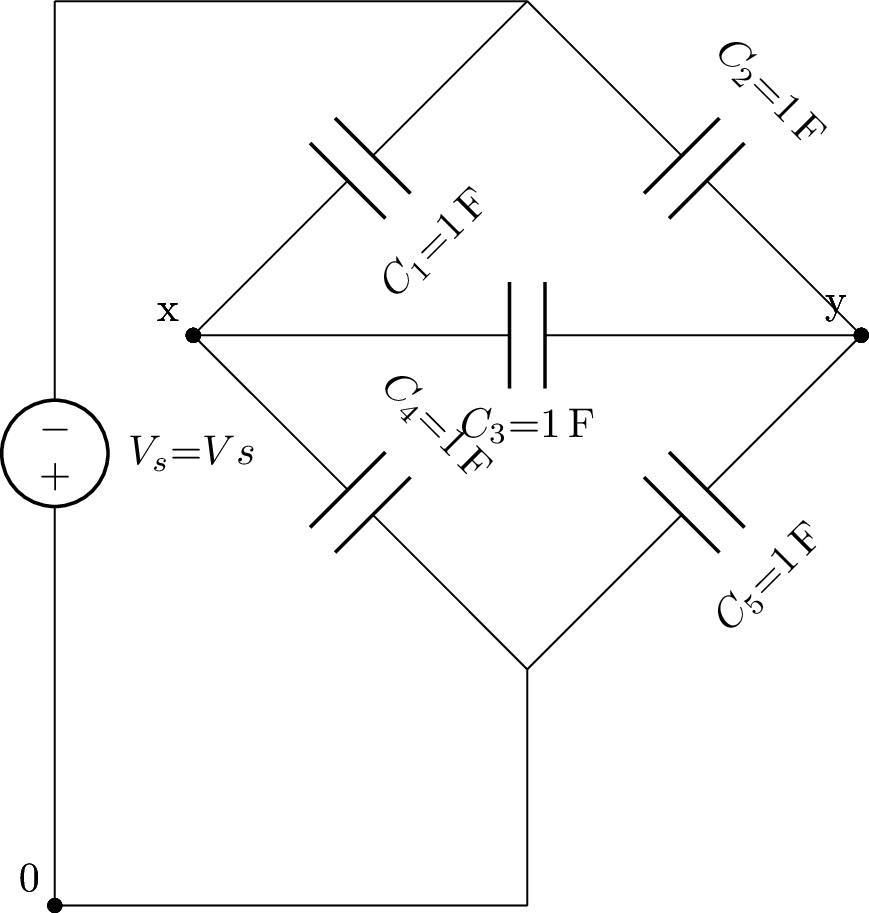

In [66]:
wheatstone_capacitors = lcapy.Circuit()
wheatstone_capacitors.add("""
Vs 1_ 0 dc Vs; down
W 1_ 2_; right=2
C1 2_ x 1; rotate=-135, size=2
C2 2_ y 1; rotate=-45, size=2
C3 y x 1; left
C4 x 5_ 1; rotate=-45, size=2
C5 y 5_ 1; rotate=-135, size=2
W 5_ 0_; down
W 0_ 0; left=2
""")
wheatstone_capacitors.draw()

In [67]:
try:
    print(wheatstone_capacitors.C1.v)
except ValueError as e:
    print(f'ValueError:\n{e}')

ValueError:
The MNA A matrix is not invertible for dc analysis because:
1. there may be capacitors in series;
2. a voltage source might be short-circuited;
3. a current source might be open-circuited.
  Check there is a DC path between all nodes.


Alas, `lcapy` can't work with series capacitors. It seems fancy software cannot always substitute for a thorough understanding of the techniques of circuit analysis. Go forth with your EE16B knowledge and prosper!